# **Konteks**
#
- Sebagai salah satu investasi jangka panjang terbaik, kepemilikan rumah selalu menjadi bagian dari impian masyarakat. Menurut Investopedia, manfaat properti nyata umumnya diwujudkan dalam jangka waktu yang lama. Oleh karena itu, perkiraan nilai properti harus mempertimbangkan tren ekonomi dan sosial.


# **Permasalahan Bisnis**
#
- Bisnis pada sektor real estate salah satu bisnis yang memiliki keuntungan yang besar namun juga memiliki resiko yang besar. Salah satu resiko pada industri real estate adalah rumah yang belum/tidak laku dijual yang diakibatkan dari ketidak sesuaian harga dengan pembeli. sangat sulit untuk menemukan harga real estat di Chennai. Menurut citizenmatters (http://citizenmatters.in/), harga di beberapa area tertentu bisa sangat bervariasi dan juga tidak ada data valid untuk tren harga di area tersebut. Sehingga perlu adanya sebuah model machine learning untuk membantu perusahaan dalam melakukan prediksi harga dengan berdasarkan aspek fisik dan fungsionalnya.

# **Goal Untuk Bisnis**

Tujuan utamanya adalah kami ingin membuat model untuk memprediksi harga real estat di Kota Chennai, Negara India dengan menggunakan variabel pendukung yang ada didalam dataset.

# Informasi Kolom Data :

- Informasi kolom :
  - PRT_ID : Nomor identitas rumah
  - AREA : Lokasi perumahan
  - INT_SQFT : Luas rumah (ft2)
  - DATE_SALE : Tanggal penjualan
  - DIST_MAINROAD : Jarak rumah dengan akses jalan raya
  - N_BEDROOM : Jumlah kamar tidur
  - N_BATHROOM : Jumlah kamar mandi
  - N_ROOM : Jumlah ruangan
  - SALE_COND : Kondisi penjualan rumah:
    - Abnormal : status penjualan rumah tidak normal (rumah sitaan, rumah bodong, dll)
    - Family : penjualan antar anggota keluarga
    - Partial : rumah dalam kondisi belum 100% berdiri
    - Adjland : lahan rumah adjoin (terpisah oleh jalanan, sungai, dll)
  - PARK_FACIL : Fasilitas parkir
  - DATE_BULD : Tanggal pembangunan rumah
  - BUILDTYPE : Tujuan pembangunan properti
  - UTILITY_AVAIL : Fasilitas yang tersedia
  - STREET : Kondisi jalan diluar rumah :
    - Paved : jalan sudah teraspal
    - Gravel : jalan belum teraspal
    - No Access : tidak ada akses jalan
  - MZZONE : Klasifikasi properti berdasarkan zonasi
    - A : daerah pertanian
    - C : daerah komersil
    - I : daerah industri
    - RH : perumahan dengan kepadatan tinggi
    - RM : perumahan dengan kepadatan sedang
    - RL : perumahan dengan kepadatan rendah
  - REG_FEE : Biaya administrasi setelah penjualan
  - COMMIS : Komisi setelah penjualan
  - SALES_PRICE : Harga penjualan# Informasi Kolom Data :

# Data Preparation

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

##### Membaca Data

In [47]:
df=pd.read_csv("Chennai houseing sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


---

# Data Wrangling

- Melihat informasi nama kolom,jumlah kolom,jumlah baris dan tipe data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

- Mengecek Missing values

In [49]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

- Melihat nilai data dari masing-masing kolom tipe data kategorikal

In [50]:
# df.select_dtypes('object')

- Melihat data dari masing-masing kolom tipe data float

In [51]:
# df.select_dtypes('float')

- Melihat data dari masing-masing kolom tipe data int

In [52]:
# df.select_dtypes('int')

#### - Review data awal :
  - Penulisan nama menggunakan huruf kapital semua
  - Total kolom 22 ada total baris 7.109
  - Tipe data tanggal penjualan dan tanggal pembangunan menggunakan tipe data string
  - Tipe data ukuran kamar mandi dan kamar tidur menggunakan tipe data float
  - Terdapat missing values N_BEDROOM (1 baris), N_BATHROOM (5 baris) dan QS_OVERALL (48 baris)

##### Merapikan nama kolom  menjadi huruf kecil semua :

In [53]:
df.columns = df.columns.str.lower()

#### Menghapus Missing values :
- n_bedroom 1
- qs_overall 48
- n_bathroom 5
- total = 54 missing values

In [54]:
df.dropna(subset=['n_bedroom'],inplace=True)

In [55]:
df.dropna(subset=['n_bathroom'],inplace=True)

In [56]:
df.dropna(subset=['qs_overall'],inplace=True)

- Merubah tipe data n_bedroom dan n_bathroom : Perubahan tipe data ini dilakukan karena n_bedroom dan n_bathroom tidak memiliki angka decimal sehingga cukup menggunakan tipe data integer

In [57]:
df['n_bedroom'] = df['n_bedroom'].astype(int)

In [58]:
df['n_bathroom'] = df['n_bathroom'].astype(int)

- Cleaning kolom area

In [59]:
df['area'].value_counts().sum()

7056

In [60]:
def area_edit (x):
    if x == 'Chrompet':
        return 'chrompet'
    elif x == 'Karapakkam':
        return 'karapakkam'
    elif x == 'KK Nagar':
        return 'kknagar'
    elif x == 'Velachery':
        return 'velachery'
    elif x == 'Karapakkam':
        return 'karapakkam'
    elif x == 'Anna Nagar':
        return 'anna nagar'
    elif x == 'Adyar':
        return 'adyar'
    elif x == 'T Nagar':
        return 'tnagar'
    elif x == 'Chrompt':
        return 'chrompet'
    elif x == 'Chrmpet':
        return 'chrompet'
    elif x == 'TNagar':
        return 'tnagar'
    elif x == 'Chormpet':
        return 'chrompet'
    elif x == 'Karapakam':
        return 'karapakkam'
    elif x == 'Ana Nagar':
        return 'anna nagar'
    elif x == 'Velchery':
        return 'velachery'
    elif x == 'Ann Nagar':
        return 'anna nagar'
    elif x == 'Adyr':
        return 'adyar'
    elif x == 'KKNagar':
        return 'kknagar'


In [61]:
df['area'] = df['area'].apply(area_edit)

In [62]:
df['area'].value_counts()

chrompet      1691
karapakkam    1359
kknagar        990
velachery      975
anna nagar     777
adyar          769
tnagar         495
Name: area, dtype: int64

- Cleaning kolom sale_cond

In [63]:
df['sale_cond'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: sale_cond, dtype: int64

In [64]:
def sale_cond_edit (x):
    if x == 'AdjLand':
        return 'adjland'
    elif x == 'Normal Sale':
        return 'normal sale'
    elif x == 'AbNormal':
        return 'abnormal'
    elif x == 'Family':
        return 'family'
    elif x == 'Adj Land':
        return 'adjland'
    elif x == 'Ab Normal':
        return 'abnormal'
    elif x == 'Partiall':
        return 'partial'
    elif x == 'PartiaLl':
        return 'partial'
    elif x == 'Partial':
        return 'partial'

In [65]:
df['sale_cond'] = df['sale_cond'].apply(sale_cond_edit)

In [66]:
df['sale_cond'].value_counts()

adjland        1432
partial        1417
normal sale    1416
abnormal       1401
family         1390
Name: sale_cond, dtype: int64

- Cleaning Kolom Park Facil 

In [67]:
df['park_facil'].value_counts()

Yes    3557
No     3498
Noo       1
Name: park_facil, dtype: int64

In [68]:
def park_facil_edit (x):
    if x == 'Yes':
        return 'yes'
    elif x == 'No':
        return 'no'
    elif x == 'Noo':
        return 'no'

In [69]:
df['park_facil'] = df['park_facil'].apply(park_facil_edit)

- Cleaning Kolom buildtype

In [70]:
df['buildtype'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: buildtype, dtype: int64

In [71]:
df[['buildtype']].value_counts()

buildtype 
House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
dtype: int64

In [72]:
def buildtype_edit (x):
    if x == 'House':
        return 'non-comercial'
    elif x == 'Commercial':
        return 'comercial'
    elif x == 'Other':
        return 'non-comercial'
    elif x == 'Comercial':
        return 'comercial'
    elif x == 'Others':
        return 'non-comercial'

In [73]:
df['buildtype'] = df['buildtype'].apply(buildtype_edit)

In [74]:
df['buildtype'].value_counts()

non-comercial    4745
comercial        2311
Name: buildtype, dtype: int64

- Cleaning Kolom utility_avail

In [75]:
def utility_avail_edit (x):
    if x == 'AllPub':
        return 'allpub'
    elif x == 'NoSeWa':
        return 'nosewa'
    elif x == 'ELO':
        return 'elo'
    elif x == 'All Pub':
        return 'allpub'
    else:
        return 'nosewa'

In [76]:
df['utility_avail'] = df['utility_avail'].apply(utility_avail_edit)

In [77]:
df['utility_avail'].value_counts()

nosewa    3672
allpub    1875
elo       1509
Name: utility_avail, dtype: int64

- Cleaning Kolom street

In [78]:
df['street'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [79]:
def street_edit (x):
    if x == 'Paved':
        return 'paved'
    elif x == 'Gravel':
        return 'gravel'
    elif x == 'No Access':
        return 'no access'
    elif x == 'Pavd':
        return 'pavd'
    elif x == 'NoAccess':
        return 'no access'

In [80]:
df['street'] = df['street'].apply(street_edit)

- Cleaning Kolom MZ

In [81]:
df['mzzone'] = df['mzzone'].str.lower()

- Mengubah waktu menjadi datetime

In [82]:
# Correcting Date columnd from object to daterime format
df['date_sale'] = pd.to_datetime(df['date_sale'], format='%d-%m-%Y')
df['date_build'] = pd.to_datetime(df['date_build'], format='%d-%m-%Y')

Hapus kolom prt_id karena tidak digunakan

In [83]:
df.drop(columns='prt_id',inplace=True)

In [84]:
df.isna().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
dtype: int64

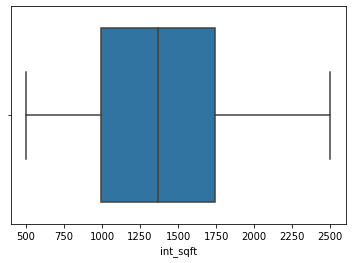

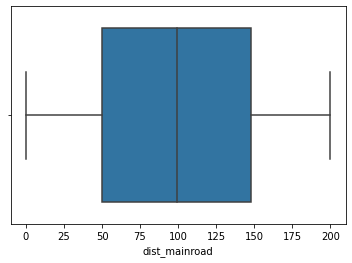

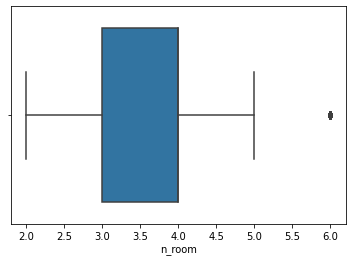

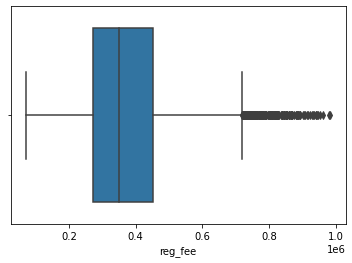

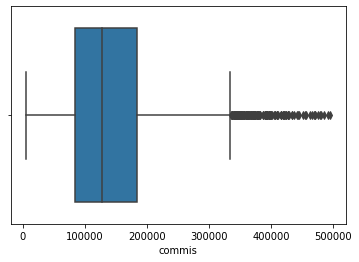

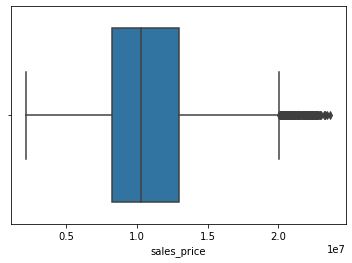

In [88]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        sns.boxplot(df[i])
        plt.show()

**Drop Oulier**

In [86]:
df_no_outlier = df
for i in ['sales_price', 'commis', 'reg_fee','n_room']:
    Q1 = df_no_outlier.describe()[i]['25%']
    Q3 = df_no_outlier.describe()[i]['75%']
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    below = Q1 - 1.5 * IQR
    
    df_no_outlier = df_no_outlier[(df_no_outlier[i] > below) & (df_no_outlier[i] < upper)]

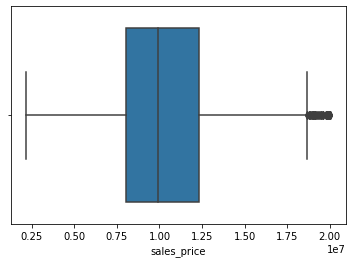

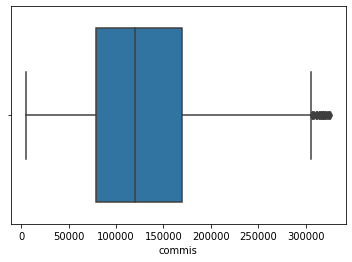

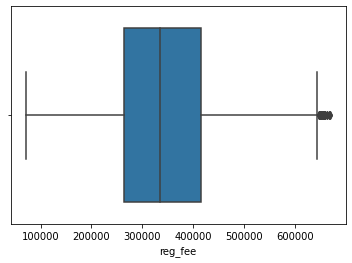

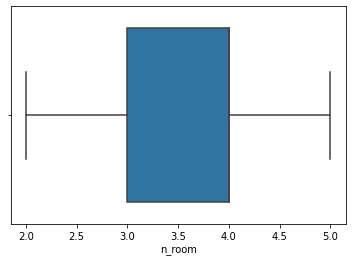

In [87]:
for i in ['sales_price', 'commis', 'reg_fee','n_room']:
    sns.boxplot(df_no_outlier[i])
    plt.show()

---

In [63]:
df.insert(3,'year_sale', df['date_sale'].dt.year)

In [64]:
df.drop(columns='sale_cond',inplace=True)

In [65]:
df.insert(4,'year_build', df['date_build'].dt.year)

In [66]:
df.insert(5,'age_range', df['year_sale']-df['year_build'])

In [67]:
df.drop(columns='year_build',inplace=True)

In [68]:
df.drop(columns='year_sale',inplace=True)

In [69]:
df.drop(columns='date_build',inplace=True)

In [70]:
df.drop(columns='date_sale',inplace=True)

In [71]:
# Membuat index baru
df = df.reset_index()

In [72]:
# Menghapus index lama
df = df.drop(columns='index')

<AxesSubplot:>

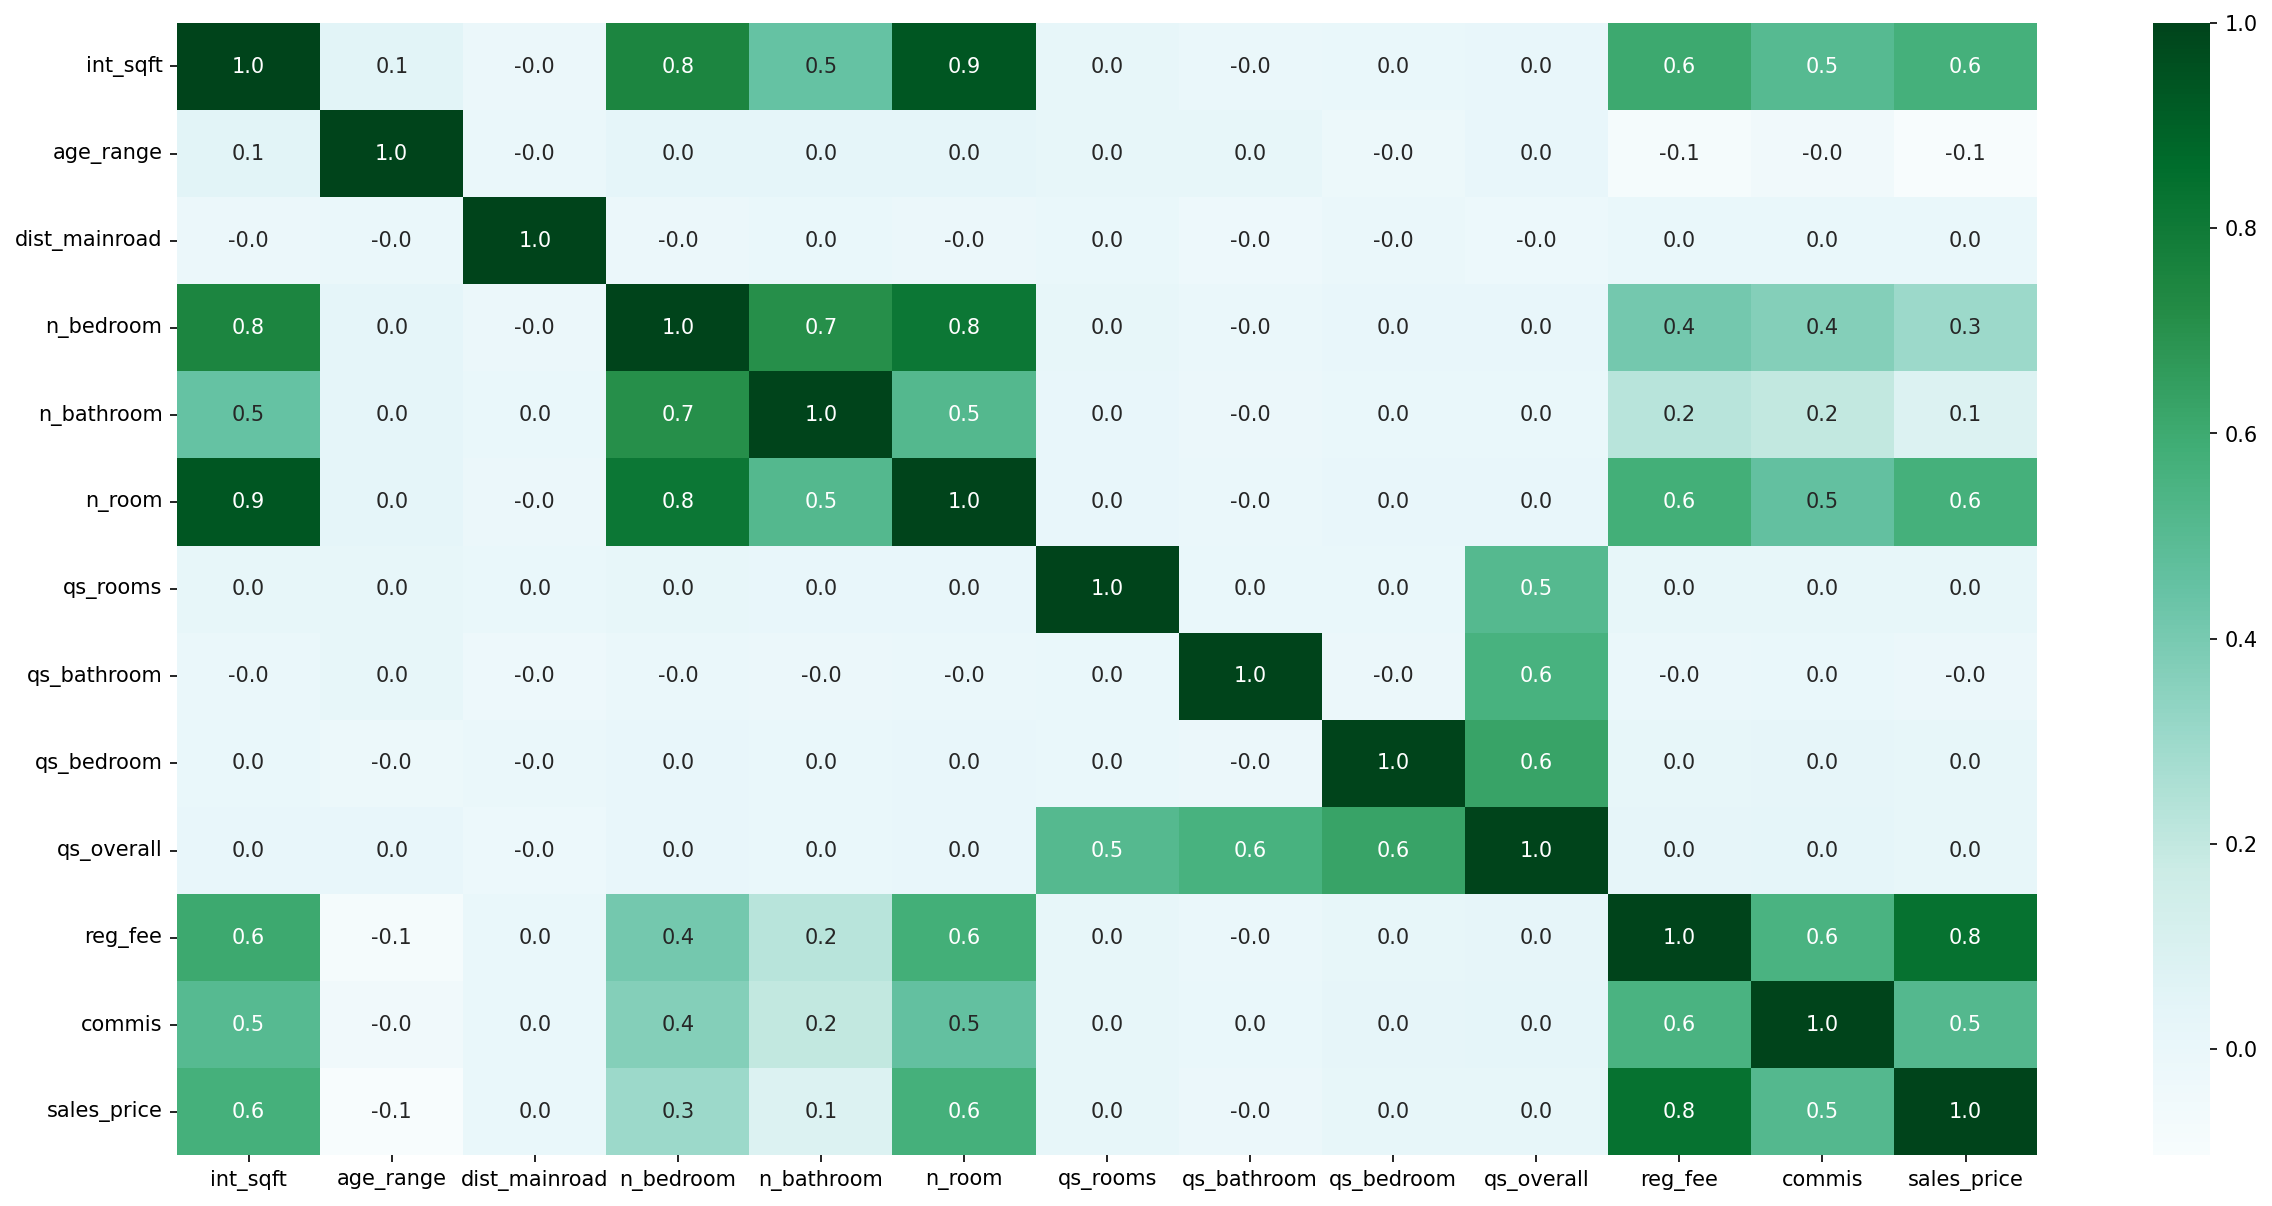

In [73]:
plt.figure(figsize=(20,10), dpi=150)
sns.heatmap(df.corr(method='pearson'),cbar=True, cmap='BuGn',annot=True,fmt='.1f')

-------------------------------------------------------------------------Data Wrangling Selesai--------------------------------------------------------------------------------------

# FEATURE ENGINERING

In [74]:
df = pd.get_dummies(df, columns=['area','street', 'mzzone','utility_avail','buildtype','park_facil'])

--------------------------------------------------------------------------------Feature Enginering Selesai-------------------------------------------------------------------------------

## FEATURE SELECTION

<AxesSubplot:>

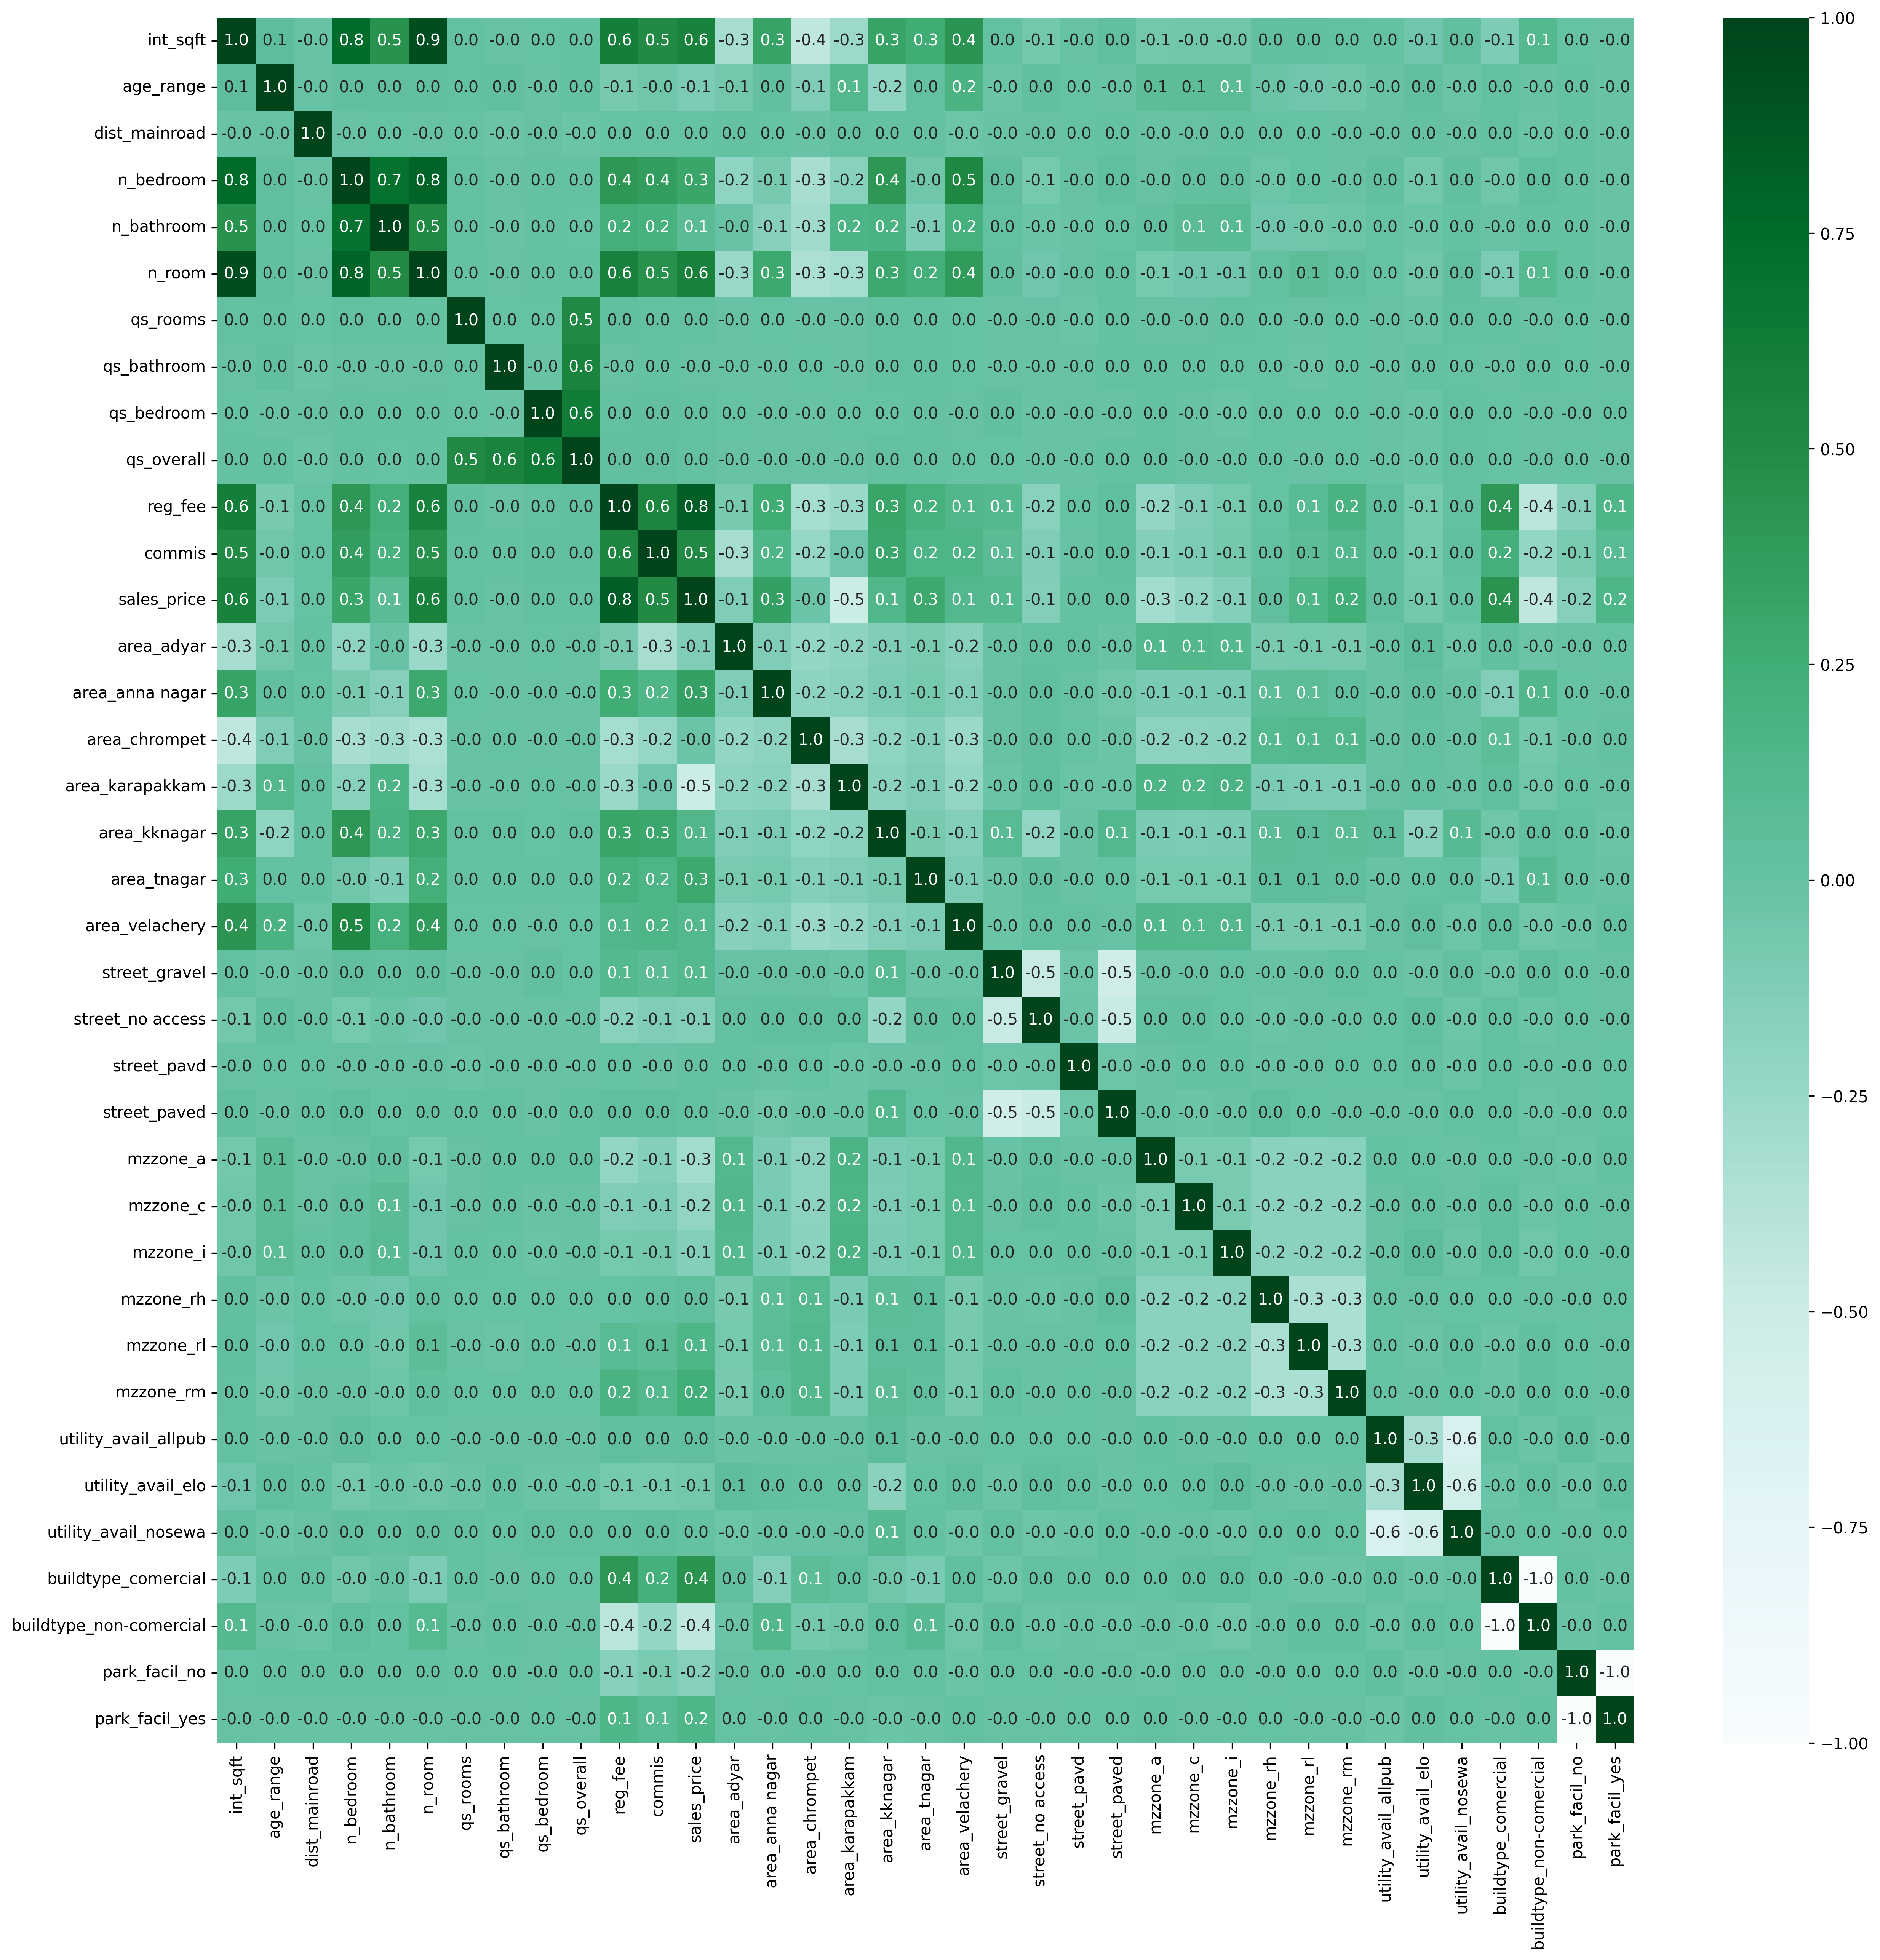

In [75]:
plt.figure(figsize=(20,20),dpi=300)
sns.heatmap(df.corr(method='pearson'),cbar=True, cmap='BuGn',annot=True,fmt='.1f')

In [76]:
# Menghapus kolom yang memiliki korelasi rendah
df.drop(columns=['qs_rooms','qs_bathroom','qs_bedroom','qs_overall'],inplace=True)

# MACHINE LEARNING

## **Model Machine Learning Sebelum Tunning**

### Menentukan Variabel

- Menentukan Variabel X dan Variabel Y

In [77]:
x=df.drop(columns=['sales_price'])
y=df['sales_price']

- Membagi proporti training dan test
- Data awal 100% :
  - Data training 85%
  - Data Test 15%

### Memisahkan Data

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.15)

### Membuat Model Machine Learning

  - Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [81]:
Model_Linear_Regression = LinearRegression()

### Membuat Pattern Model Machine Learning

- Membuat Pattern dari soal training ke jawaban training

In [82]:
Model_Linear_Regression.fit(x_train,y_train)

LinearRegression()

### Memprediksi Target

In [83]:
prediksi_Linear_Regression_test = Model_Linear_Regression.predict(x_test)

### Membuat Data Frame Baru

- Membuat Variabel X Latihan ke Data Frame
- Membuat Variabel X Test ke Data Frame

In [84]:
df_x_train_regressi_linear = pd.DataFrame(x_train)

In [85]:
df_x_test_regressi_linear = pd.DataFrame(x_test)

### Melakukan Evaluasi Matrix

In [86]:
def evaluasi_matrix(Model,x,y_true):
    y_prediksi=Model.predict(x)
    R2=r2_score(y_true,y_prediksi)
    MAE=mean_absolute_error(y_true,y_prediksi)
    MSE=mean_squared_error(y_true,y_prediksi)
    RMSE=np.sqrt(MSE)
    return R2,MAE,MSE,RMSE

In [87]:
r2_LR_Train,MAE_LR_Train,MSE_LR_Train,RMSE_LR_Train=evaluasi_matrix(Model_Linear_Regression,df_x_train_regressi_linear,y_train)
r2_LR_Test,MAE_LR_Test,MSE_LR_Test,RMSE_LR_Test=evaluasi_matrix(Model_Linear_Regression,df_x_test_regressi_linear,y_test)

In [88]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'Linear Regression Training':[r2_LR_Train,MAE_LR_Train,MSE_LR_Train,RMSE_LR_Train],
    'Linear Regression Testing':[r2_LR_Test,MAE_LR_Test,MSE_LR_Test,RMSE_LR_Test]}

summary1=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summary1.T

,R-Squared,MAE,MSE,RMSE
Linear Regression Training,0.96,467036.74,3.572962e+11,597742.59
Linear Regression Testing,0.96,459912.83,3.553591e+11,596120.03


**Review Perbandingan Data tanpa machine learning dan Menggunakan machine learning)**

In [89]:
harga_prediksi = Model_Linear_Regression.predict(x)

In [90]:
df['prediksi'] = harga_prediksi.round(2)

In [91]:
df['price_predict'] = df['prediksi'].astype('int64')

In [92]:
df['price_gap'] = df['sales_price'] - df['price_predict']

In [93]:
df[['sales_price','price_predict','price_gap']]

,sales_price,price_predict,price_gap
0,7600000,8837380,-1237380
1,13159200,13203294,-44094
2,9630290,9659490,-29200
3,7406250,6686270,719980
4,12394750,12526617,-131867
...,...,...,...
6336,5353000,4194513,1158487
6337,10818480,10770173,48307
6338,8351410,9121068,-769658
6339,8507000,9974141,-1467141


# Kesimpulan
#
- Model yang digunakan cukup efektif untuk memprediksi harga rumah, dengan tingkat ke akuratan dari training skor 96% dan dari test 96% skor.
